# Data

Dowload the following data and place them next to the code:

(1) Electricity use per person 

(2) Oil consumption per person

from: https://www.gapminder.org/data/

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
!ls

001-Loading-and-visualizing-data-Copy1.ipynb
001-Loading-and-visualizing-data.ipynb
001-Python-Exam-Prep-1
README.md
electricity_use_per_person.csv
oil_consumption_per_cap.csv


In [3]:
oil_data_file_path = 'oil_consumption_per_cap.csv'
electricity_data_file_path = 'electricity_use_per_person.csv'

In [5]:
oil_df = pd.read_csv(oil_data_file_path, index_col='country')
oil_df.columns = [int(val) for val in oil_df.columns]
oil_df = oil_df[range(1971, 2015)]
oil_df = oil_df.fillna(method='bfill', axis=1)
oil_df.head(2)

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Algeria,0.153,0.163,0.173,0.187,0.202,0.226,0.249,0.248,0.289,0.283,...,0.331,0.341,0.376,0.402,0.419,0.411,0.430,0.448,0.458,0.452
Argentina,0.969,0.954,0.939,0.930,0.860,0.881,0.913,0.899,0.937,0.863,...,0.530,0.550,0.605,0.616,0.596,0.681,0.679,0.703,0.749,0.729


In [7]:
electricity_df = pd.read_csv(electricity_data_file_path, index_col='country')
electricity_df.columns = [int(val) for val in electricity_df.columns]
electricity_matching_oil_df = electricity_df.loc[oil_df.index, :]
electricity_matching_oil_df = electricity_matching_oil_df[range(1971, 2015)]
electricity_matching_oil_df = electricity_matching_oil_df.fillna(method='bfill', axis=1)
electricity_matching_oil_df.head(2)

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Algeria,134.0,143.0,159.0,171.0,196.0,220.0,233.0,279.0,315.0,330.0,...,891.0,862.0,894.0,947.0,866.0,1020.0,1120.0,1240.0,1280.0,1360.0
Argentina,874.0,925.0,962.0,993.0,1010.0,1030.0,1080.0,1090.0,1220.0,1240.0,...,2410.0,2370.0,2460.0,2770.0,2730.0,2880.0,2930.0,3000.0,2970.0,3070.0


In [8]:
electricity_matching_oil_df.shape

(65, 44)

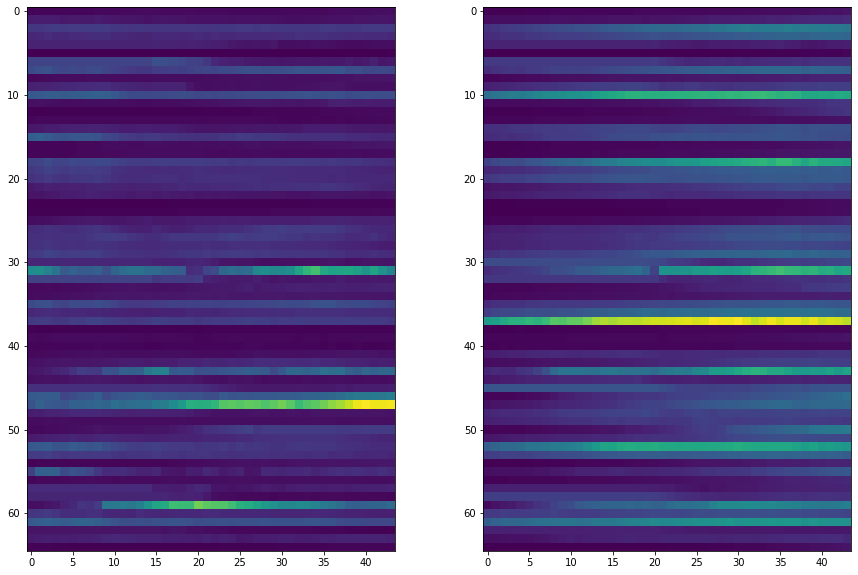

In [9]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(oil_df)
plt.subplot(1, 2, 2)
plt.imshow(electricity_matching_oil_df)

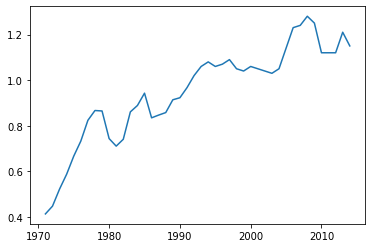

In [10]:
plt.plot(oil_df.loc['Iran', :])

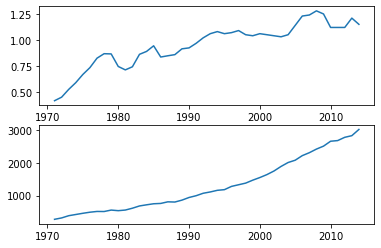

In [11]:
plt.subplot(2, 1, 1)
plt.plot(oil_df.loc['Iran', :])
plt.subplot(2, 1, 2)
plt.plot(electricity_matching_oil_df.loc['Iran', :])

In [15]:
electricity_matching_oil_df.loc[:, 2014].sort_values()

country
Bangladesh       320.0
Pakistan         448.0
Philippines      696.0
India            805.0
Indonesia        812.0
                ...   
Qatar          14800.0
Finland        15200.0
Canada         15600.0
Kuwait         15600.0
Norway         23000.0
Name: 2014, Length: 65, dtype: float64

In [16]:
electricity_matching_oil_df.loc[:, 2014].sort_values(ascending=False).head(10)

country
Norway                  23000.0
Kuwait                  15600.0
Canada                  15600.0
Finland                 15200.0
Qatar                   14800.0
Sweden                  13500.0
United States           13000.0
United Arab Emirates    11100.0
South Korea             10500.0
Australia               10100.0
Name: 2014, dtype: float64

In [17]:
electricity_matching_oil_df.loc[:, 2014].sort_values(ascending=False).tail(10)

country
Vietnam        1420.0
Ecuador        1380.0
Algeria        1360.0
Peru           1350.0
Colombia       1310.0
Indonesia       812.0
India           805.0
Philippines     696.0
Pakistan        448.0
Bangladesh      320.0
Name: 2014, dtype: float64

In [19]:
electricity_matching_oil_df.loc[:, 2014].sample(10)

country
Ecuador             1380.0
Brazil              2620.0
Canada             15600.0
China               3930.0
Qatar              14800.0
Slovak Republic     5140.0
Germany             7040.0
Kuwait             15600.0
Indonesia            812.0
Australia          10100.0
Name: 2014, dtype: float64

In [22]:
electricity_matching_oil_df.sort_values(by=1971).tail()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Russia,6690.0,6690.0,6690.0,6690.0,6690.0,6690.0,6690.0,6690.0,6690.0,6690.0,...,5770.0,6100.0,6290.0,6400.0,6100.0,6410.0,6490.0,6620.0,6540.0,6600.0
United States,7520.0,8080.0,8570.0,8450.0,8520.0,8970.0,9340.0,9560.0,9700.0,9860.0,...,13700.0,13600.0,13700.0,13700.0,12900.0,13400.0,13200.0,13000.0,13000.0,13000.0
Sweden,7670.0,8130.0,8750.0,8790.0,9050.0,9750.0,9830.0,10100.0,10700.0,10700.0,...,15400.0,15300.0,15300.0,14900.0,14100.0,14900.0,14000.0,14300.0,13900.0,13500.0
Canada,9170.0,9800.0,10200.0,10800.0,10500.0,11100.0,11800.0,12300.0,12400.0,12800.0,...,16900.0,16500.0,16700.0,16400.0,15500.0,15300.0,15600.0,15300.0,15800.0,15600.0
Norway,14100.0,14500.0,15500.0,16300.0,16300.0,16900.0,16500.0,17300.0,18900.0,18700.0,...,25100.0,24100.0,24900.0,24900.0,23900.0,24900.0,23500.0,24100.0,23800.0,23000.0


In [23]:
electricity_matching_oil_df.mean()

1971    2432.089231
1972    2585.343077
1973    2721.469231
1974    2788.818462
1975    2835.455385
1976    2992.680000
1977    3105.470769
1978    3259.256923
1979    3455.446154
1980    3548.573846
1981    3621.667692
1982    3681.183077
1983    3799.749231
1984    3965.566154
1985    4102.927692
1986    4178.584615
1987    4301.724615
1988    4399.372308
1989    4466.203077
1990    4519.432308
1991    4472.295385
1992    4571.636923
1993    4591.449231
1994    4646.540000
1995    4727.326154
1996    4837.106154
1997    4911.303077
1998    5039.089231
1999    5111.510769
2000    5239.646154
2001    5327.030769
2002    5404.184615
2003    5504.184615
2004    5603.323077
2005    5675.553846
2006    5758.138462
2007    5814.261538
2008    5797.138462
2009    5591.169231
2010    5807.892308
2011    5760.292308
2012    5819.861538
2013    5782.784615
2014    5780.015385
dtype: float64

In [24]:
electricity_matching_oil_df.mean(axis=1)

country
Algeria             593.431818
Argentina          1746.454545
Australia          8185.227273
Austria            6160.454545
Azerbaijan         2300.000000
                      ...     
United Kingdom     5315.000000
United States     11548.409091
Uzbekistan         2056.363636
Venezuela          2407.500000
Vietnam             323.313636
Length: 65, dtype: float64

In [25]:
electricity_matching_oil_df.mean(axis=1).sort_values()

country
Bangladesh          97.295455
Indonesia          274.534091
Pakistan           287.056818
Vietnam            323.313636
India              335.200000
                     ...     
United States    11548.409091
Finland          12144.090909
Sweden           13603.863636
Canada           14840.227273
Norway           21977.272727
Length: 65, dtype: float64

In [27]:
electricity_matching_oil_df.loc[electricity_matching_oil_df.mean(axis=1).sort_values().index, :].tail()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
United States,7520.0,8080.0,8570.0,8450.0,8520.0,8970.0,9340.0,9560.0,9700.0,9860.0,...,13700.0,13600.0,13700.0,13700.0,12900.0,13400.0,13200.0,13000.0,13000.0,13000.0
Finland,4890.0,5520.0,6050.0,6140.0,5950.0,6550.0,6730.0,7330.0,7930.0,8300.0,...,16100.0,17200.0,17200.0,16300.0,15200.0,16500.0,15700.0,15700.0,15500.0,15200.0
Sweden,7670.0,8130.0,8750.0,8790.0,9050.0,9750.0,9830.0,10100.0,10700.0,10700.0,...,15400.0,15300.0,15300.0,14900.0,14100.0,14900.0,14000.0,14300.0,13900.0,13500.0
Canada,9170.0,9800.0,10200.0,10800.0,10500.0,11100.0,11800.0,12300.0,12400.0,12800.0,...,16900.0,16500.0,16700.0,16400.0,15500.0,15300.0,15600.0,15300.0,15800.0,15600.0
Norway,14100.0,14500.0,15500.0,16300.0,16300.0,16900.0,16500.0,17300.0,18900.0,18700.0,...,25100.0,24100.0,24900.0,24900.0,23900.0,24900.0,23500.0,24100.0,23800.0,23000.0


In [28]:
electricity_matching_oil_df['mean_usage'] = electricity_matching_oil_df.mean(axis=1)

In [29]:
electricity_matching_oil_df.head()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,mean_usage
country,,,,,,,,,,,,,,,,,,,,,
Algeria,134.0,143.0,159.0,171.0,196.0,220.0,233.0,279.0,315.0,330.0,...,862.0,894.0,947.0,866.0,1020.0,1120.0,1240.0,1280.0,1360.0,593.431818
Argentina,874.0,925.0,962.0,993.0,1010.0,1030.0,1080.0,1090.0,1220.0,1240.0,...,2370.0,2460.0,2770.0,2730.0,2880.0,2930.0,3000.0,2970.0,3070.0,1746.454545
Australia,3750.0,3880.0,4230.0,4580.0,4780.0,4900.0,5250.0,5420.0,5670.0,5920.0,...,10500.0,11000.0,10700.0,10800.0,10700.0,10600.0,10400.0,10200.0,10100.0,8185.227273
Austria,3210.0,3400.0,3620.0,3770.0,3730.0,4070.0,4140.0,4340.0,4540.0,4680.0,...,8240.0,8210.0,8230.0,7940.0,8380.0,8430.0,8550.0,8510.0,8360.0,6160.454545
Azerbaijan,2580.0,2580.0,2580.0,2580.0,2580.0,2580.0,2580.0,2580.0,2580.0,2580.0,...,2550.0,2120.0,2040.0,1620.0,1600.0,1710.0,2050.0,2090.0,2200.0,2300.000000


In [30]:
electricity_matching_oil_df = electricity_matching_oil_df.drop(['mean_usage'], axis=1)

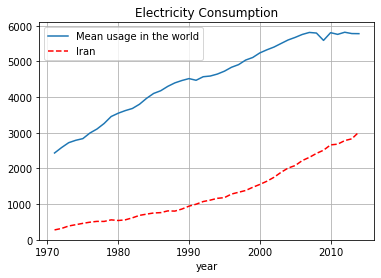

In [38]:
plt.plot(electricity_matching_oil_df.mean(axis=0))
plt.plot(electricity_matching_oil_df.loc['Iran', :], 'r--')
plt.legend(['Mean usage in the world', 'Iran'])
plt.xlabel('year')
plt.title('Electricity Consumption');
plt.grid()

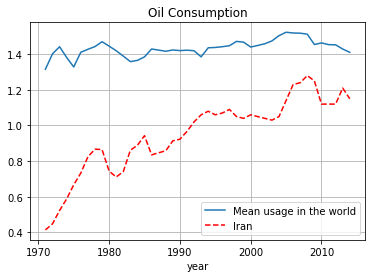

In [39]:
plt.plot(oil_df.mean(axis=0))
plt.plot(oil_df.loc['Iran', :], 'r--')
plt.legend(['Mean usage in the world', 'Iran'])
plt.xlabel('year')
plt.title('Oil Consumption');
plt.grid()

(array([16., 17., 15.,  6.,  4.,  2.,  4.,  0.,  0.,  1.]),
 array([  320.,  2588.,  4856.,  7124.,  9392., 11660., 13928., 16196.,
        18464., 20732., 23000.]),
 <a list of 10 Patch objects>)

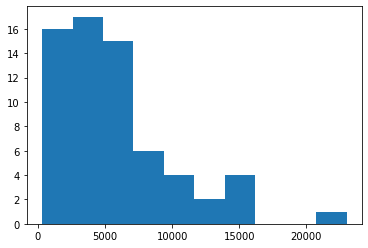

In [40]:
plt.hist(electricity_matching_oil_df.loc[:, 2014])

(array([12., 11.,  6.,  7.,  7.,  5.,  4.,  3.,  2.,  1.,  1.,  0.,  1.,
         2.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
         9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000,
        18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000]),
 <a list of 25 Patch objects>)

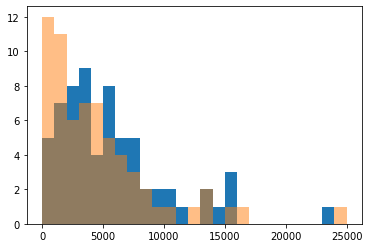

In [45]:
plt.hist(electricity_matching_oil_df.loc[:, 2014], bins=np.arange(0, 25001, 1000))
plt.hist(electricity_matching_oil_df.loc[:, 1994], bins=np.arange(0, 25001, 1000), alpha=0.5)

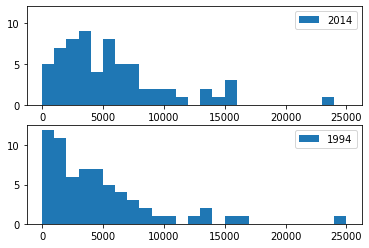

In [49]:
plt.figure()
plt.subplot(2, 1, 1)
plt.hist(electricity_matching_oil_df.loc[:, 2014], bins=np.arange(0, 25001, 1000))
plt.ylim((0, 12))
plt.legend(['2014'])
plt.subplot(2, 1, 2)
plt.hist(electricity_matching_oil_df.loc[:, 1994], bins=np.arange(0, 25001, 1000))
plt.legend(['1994'])

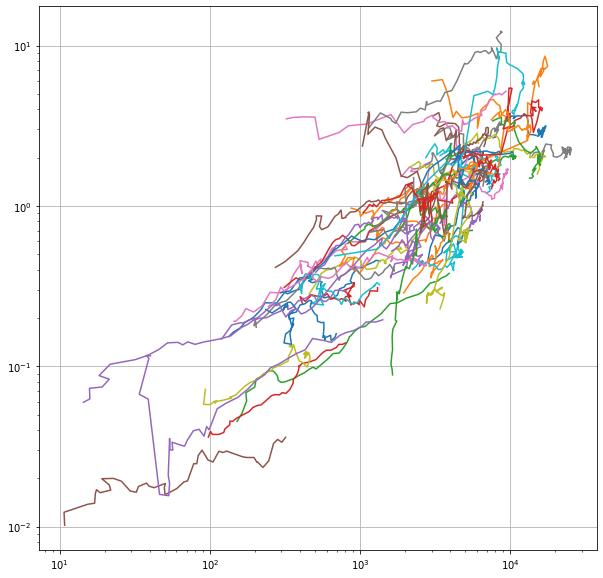

In [53]:
plt.figure(figsize=(10, 10))
for country in electricity_matching_oil_df.index:
    plt.plot(electricity_matching_oil_df.loc[country, :], oil_df.loc[country, :])
plt.xscale('log')
plt.yscale('log')
plt.grid()

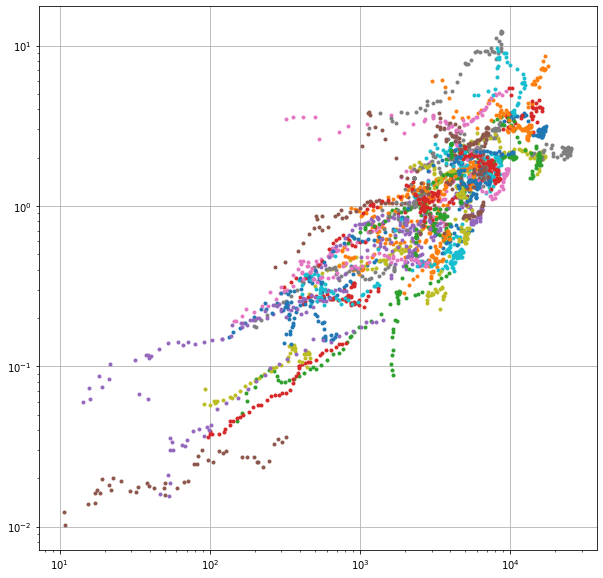

In [54]:
plt.figure(figsize=(10, 10))
for country in electricity_matching_oil_df.index:
    plt.plot(electricity_matching_oil_df.loc[country, :], oil_df.loc[country, :], '.')
plt.xscale('log')
plt.yscale('log')
plt.grid()

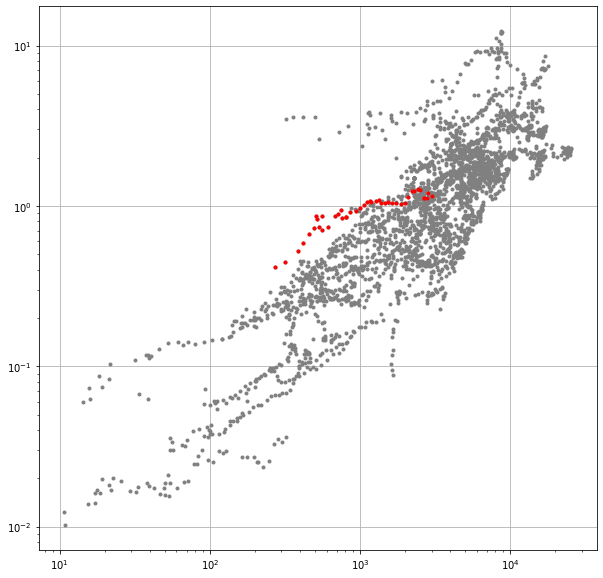

In [55]:
plt.figure(figsize=(10, 10))
for country in electricity_matching_oil_df.index:
    plt.plot(electricity_matching_oil_df.loc[country, :], oil_df.loc[country, :], '.', color='gray')
plt.plot(electricity_matching_oil_df.loc['Iran', :], oil_df.loc['Iran', :], '.', color='red')
plt.xscale('log')
plt.yscale('log')
plt.grid()

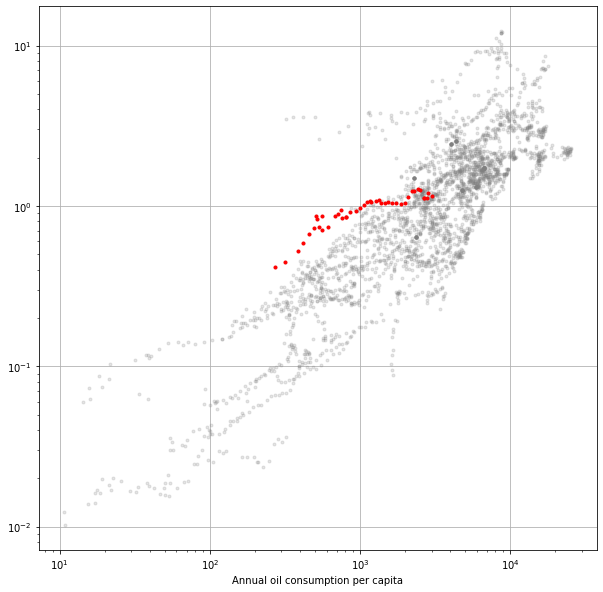

In [59]:
plt.figure(figsize=(10, 10))
for country in electricity_matching_oil_df.index:
    plt.plot(electricity_matching_oil_df.loc[country, :], oil_df.loc[country, :], '.', color='gray', alpha=0.2)
plt.plot(electricity_matching_oil_df.loc['Iran', :], oil_df.loc['Iran', :], '.', color='red')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.xlabel('Annual electricity consumption per capita')
plt.xlabel('Annual oil consumption per capita')
plt.savefig('electricity_vs_oil.png', dpi=700)